# Importações

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

# Importação base de dados 1

In [73]:
df = pd.read_csv('monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [75]:
df['data'] = pd.to_datetime(df['data'])

# Analise 1 de dados com MATPLOTLIB

cores: https://matplotlib.org/gallery/color/named_colors.html

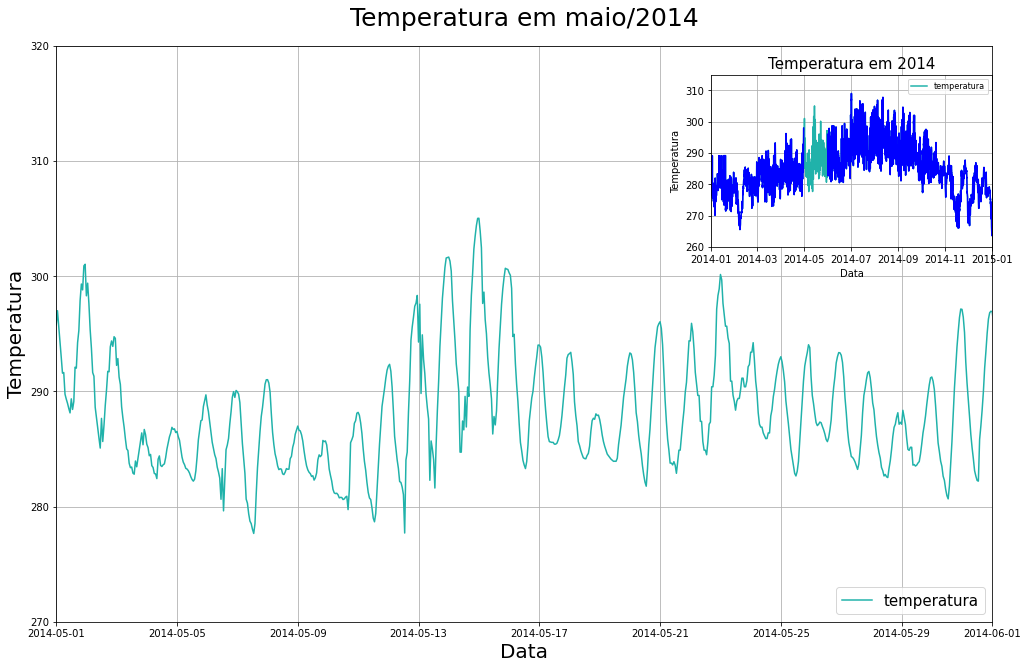

In [76]:

fig = plt.figure(figsize=(13,8))

eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3])

# Eixo 1
eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'lightseagreen')  #  Outros parametros: lw -> espessura da linha. ls -> stylo da linha. marker -> simbolo na linha.
eixo.set_title('Temperatura em maio/2014', fontsize = 25, pad = 20)
eixo.legend(['temperatura'], loc = 'lower right', fontsize = 15)
eixo.set_ylabel('Temperatura', fontsize = 20)
eixo.set_xlabel('Data', fontsize = 20)
eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,6,1)) # Periodo de tempo.
eixo.set_ylim(270,320)

# Eixo 2
azul_esquerda = df['data'] < datetime.datetime(2014,5,1)
azul_direita = df['data'] > datetime.datetime(2014,6,1)

eixo2.plot(df['data'], df['temperatura'], color = 'lightseagreen') 

# Sobrescrever a cor
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color = 'b')

eixo2.set_title('Temperatura em 2014', fontsize = 15)
eixo2.legend(['temperatura'], loc = 'best', fontsize = 8)
eixo2.set_ylabel('Temperatura', fontsize = 10)
eixo2.set_xlabel('Data', fontsize = 10)
eixo2.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1)) # Periodo de tempo.
eixo2.grid(True)

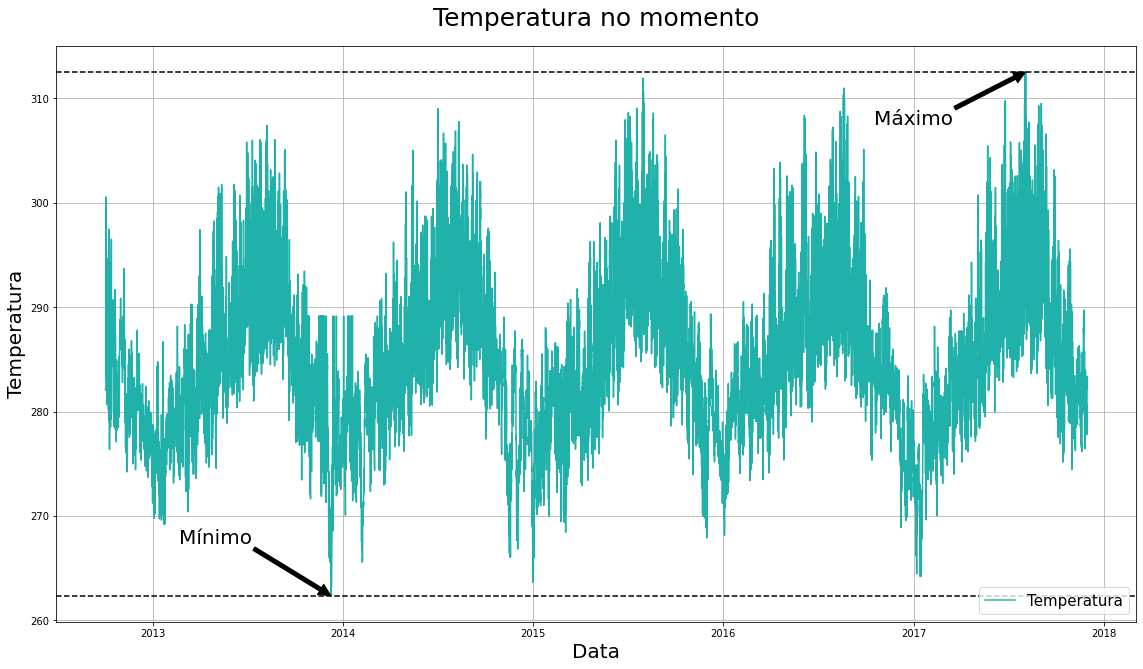

In [77]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'lightseagreen')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)

# Local da linha de maximo.
x1 = df['data'][df['temperatura'].idxmax()] # idxmax -> maior posição de temperatura (id maximo)
y1 = max(df['temperatura'])

# Local origem da seta maximo.
x2 = df['data'][df['temperatura'].idxmax() - 7000] 
y2 = max(df['temperatura'] - 5)

eixo.annotate("Máximo",
              xy = (x1,y1), # Posição da seta
              fontsize = 20,
              xytext = (x2, y2), # Posição do texto
              arrowprops = dict(facecolor = 'k')) # Seta na cor preta.


# Local da linha de minimo.
x1 = df['data'][df['temperatura'].idxmin()] # idxmin -> menor posição de temperatura (id maximo)
y1 = min(df['temperatura'])

# Local origem da seta minimo.
x2 = df['data'][df['temperatura'].idxmin() - 7000] 
y2 = min(df['temperatura'] + 5)

# Anota o ponto xy com texto.
eixo.annotate("Mínimo",
              xy = (x1,y1), # Posição da seta
              fontsize = 20,
              xytext = (x2, y2), # Posição do texto
              arrowprops = dict(facecolor = 'k')) # Seta na cor preta.

# Linha mostrando a temperatura maxima.
eixo.axhline(max(df['temperatura']),
             color = 'k', # Cor preta
             linestyle = '--') # stylo da linha

# Linha mostrando a temperatura minima.
eixo.axhline(min(df['temperatura']),
             color = 'k',
             linestyle = '--')

In [78]:
temperatura_por_dia_da_semana = df.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Segunda'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Sábado')]

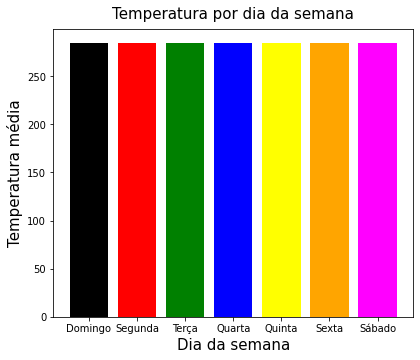

In [79]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

indice = range(len(temperatura_por_dia_da_semana))
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']

#Grafico de barras
eixo.bar(indice, temperatura_por_dia_da_semana,
         color=cores) # Cores da lista.
         
eixo.set_title('Temperatura por dia da semana',
               fontsize=15,
               pad=10) # Distancia do titulo.

eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

# Transformar os valores do eixo x em string.
eixo.set_xticklabels(indice)
eixo.set_xticklabels(nome_dias)



Text(0.5, 1.0, 'Temperatura por dia da semana')

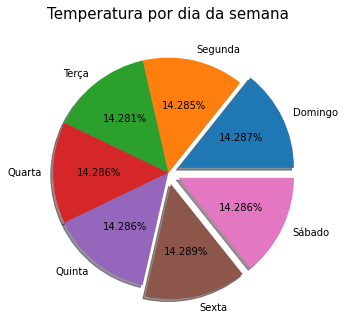

In [80]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.1, 0, 0, 0, 0, 0.1, 0.1] # Pedaços que vão ser soltos.

eixo.pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index, 
         autopct = '%.3f%%', # Adicionar porcentagem nos pedaços de pizza.
         explode = explodir, # Dividir os pedaços da pizza.
         shadow = True) # Adcionar sombra.

eixo.set_title('Temperatura por dia da semana', size=15, pad=10)

# Importação base de dados 2



In [81]:
df = pd.read_csv('iris.csv')
df.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Analise 2 de dados com MATPLOTLIB

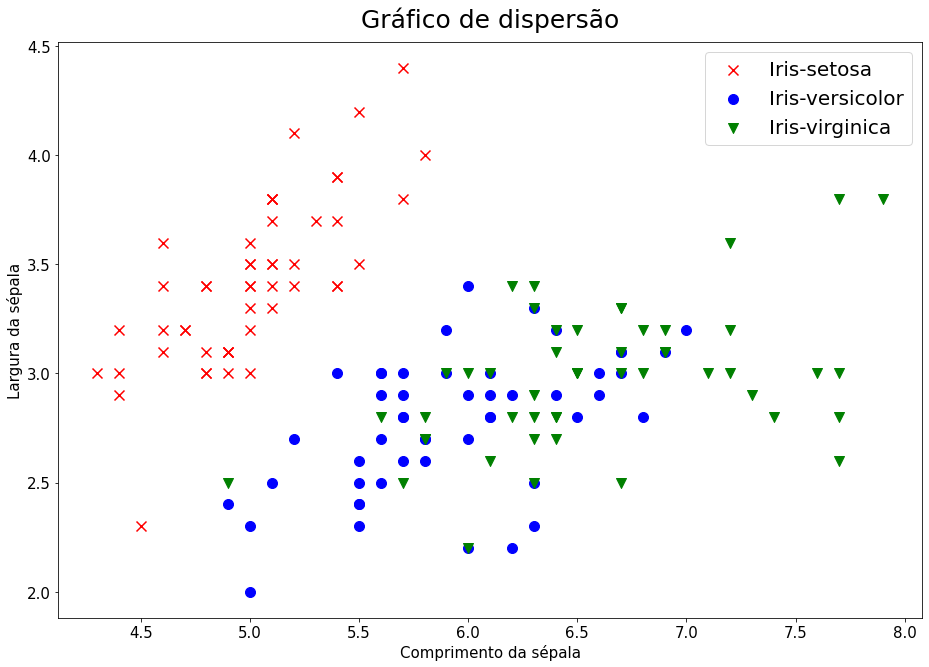

In [93]:
fig = plt.figure(figsize=(12,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r',
         'Iris-versicolor': 'b',
         'Iris-virginica': 'g'}

marcadores = {'Iris-setosa': 'x',
              'Iris-versicolor': 'o',
              'Iris-virginica': 'v'}

# Plotar um scatter plot para cada especie
for especie in df['espécie'].unique():
  tmp = df[df['espécie'] == especie]
  eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
               color = cores[especie], # Core de cada especie
               marker = marcadores[especie], # Simbolo que cada especie.
               s = 100) # Tamanho das marcações

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)

[Text(0, 0, 'comprimento_sépala'),
 Text(0, 0, 'largura_sépala'),
 Text(0, 0, 'comprimento_pétala'),
 Text(0, 0, 'largura_pétala')]

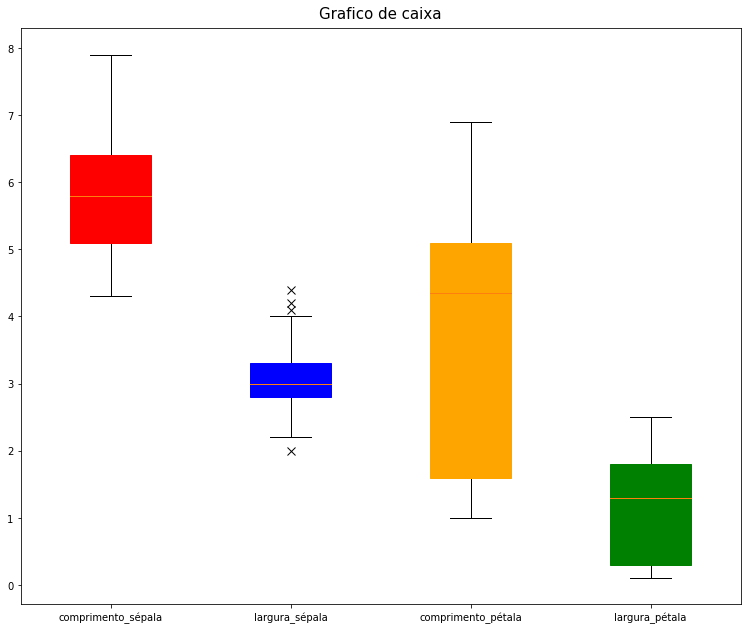

In [105]:
fig = plt.figure(figsize=(10,8))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = eixo.boxplot(df.drop('espécie', axis = 1).values,
             patch_artist=True) # preencher o boxplot.

# Associa cada caixa a uma cor.             
for caixa, cor in zip(caixas['boxes'], cores):
  caixa.set(color=cor)
  
# Transformando os outlier em simbolo = x
for outlier in caixas['fliers']:
  outlier.set(marker = 'x', markersize = 8)

eixo.set_title('Grafico de caixa', fontsize = 15, pad = 10)
eixo.set_xticklabels(df.drop('espécie', axis = 1).columns)

Text(4.35, 31, 'mediana')

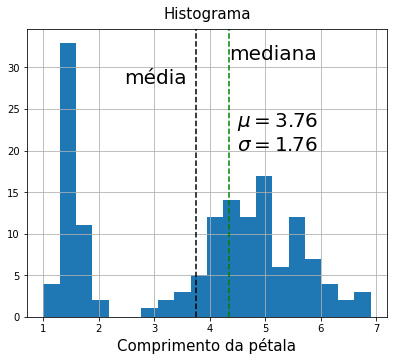

In [121]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma), # Adicionando o valor da media e do desvio padrão no grafico.
               xy=(4.5, 20), # Posição da mu e sigma
               fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--') # Criação da linha da media.
eixo.annotate('média', xy=(mu-1.3, 28), fontsize=20) # Adicionando o nome media na posição xy

eixo.axvline(df['comprimento_pétala'].median(), color = 'g', linestyle = '--')  # Criação da linha da mediana.
eixo.annotate('mediana', xy=(df['comprimento_pétala'].median(), 31), fontsize = 20) # Adicionando o nome mediana na posição xy



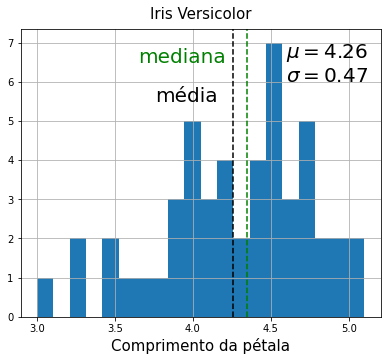

In [125]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-versicolor']

mu, sigma = df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std()

eixo.hist(df_iv['comprimento_pétala'], bins=20)
eixo.set_title('Iris Versicolor', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.6, 6), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.5, 5.5), fontsize=20)

eixo.axvline(df_iv['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_iv['comprimento_pétala'].median()-0.7, 6.5), fontsize=20,
               color='g')

fig.savefig('histograma_iv.png',
            bbox_inches='tight') # Não deixar um espaço em branco muito grande envolta da imagem.

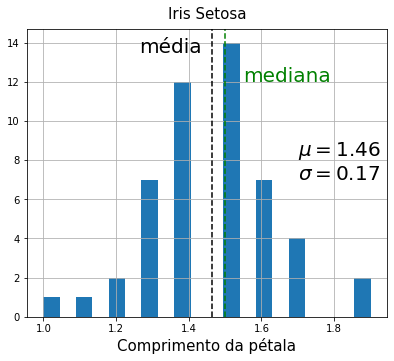

In [124]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_is = df[df['espécie'] == 'Iris-setosa']

mu, sigma = df_is['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_is['comprimento_pétala'], bins=20)
eixo.set_title('Iris Setosa', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(1.7, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.2, 13.5), fontsize=20)

eixo.axvline(df_is['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_is['comprimento_pétala'].median()+0.05, 12), fontsize=20,
               color='g')

fig.savefig('histograma_is.png', bbox_inches='tight')

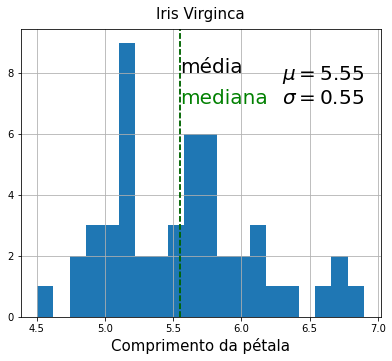

In [132]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ivc = df[df['espécie'] == 'Iris-virginica']

mu, sigma = df_ivc['comprimento_pétala'].mean(), df_ivc['comprimento_pétala'].std()

eixo.hist(df_ivc['comprimento_pétala'], bins=20)
eixo.set_title('Iris Virginca', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(6.3, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu, 8), fontsize=20)

eixo.axvline(df_ivc['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_ivc['comprimento_pétala'].median(), 7), fontsize=20,
               color='g')

fig.savefig('histograma_ivg.png', bbox_inches='tight')